Importing Required Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Importing CSV File

In [2]:
medical_insurance_df = pd.read_csv(r"C:\Users\shogi\Desktop\DS\02_Project\03_MedicalInsurance\medical_insurance.csv")

In [ ]:
EDA

In [3]:
medical_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
medical_insurance_df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print(f"Sex : {medical_insurance_df['sex'].unique()}\n")
print(f"Smoker : {medical_insurance_df['smoker'].unique()}\n")
print(f"Region : {medical_insurance_df['region'].unique()}\n")

Sex : ['female' 'male']

Smoker : ['yes' 'no']

Region : ['southwest' 'southeast' 'northwest' 'northeast']



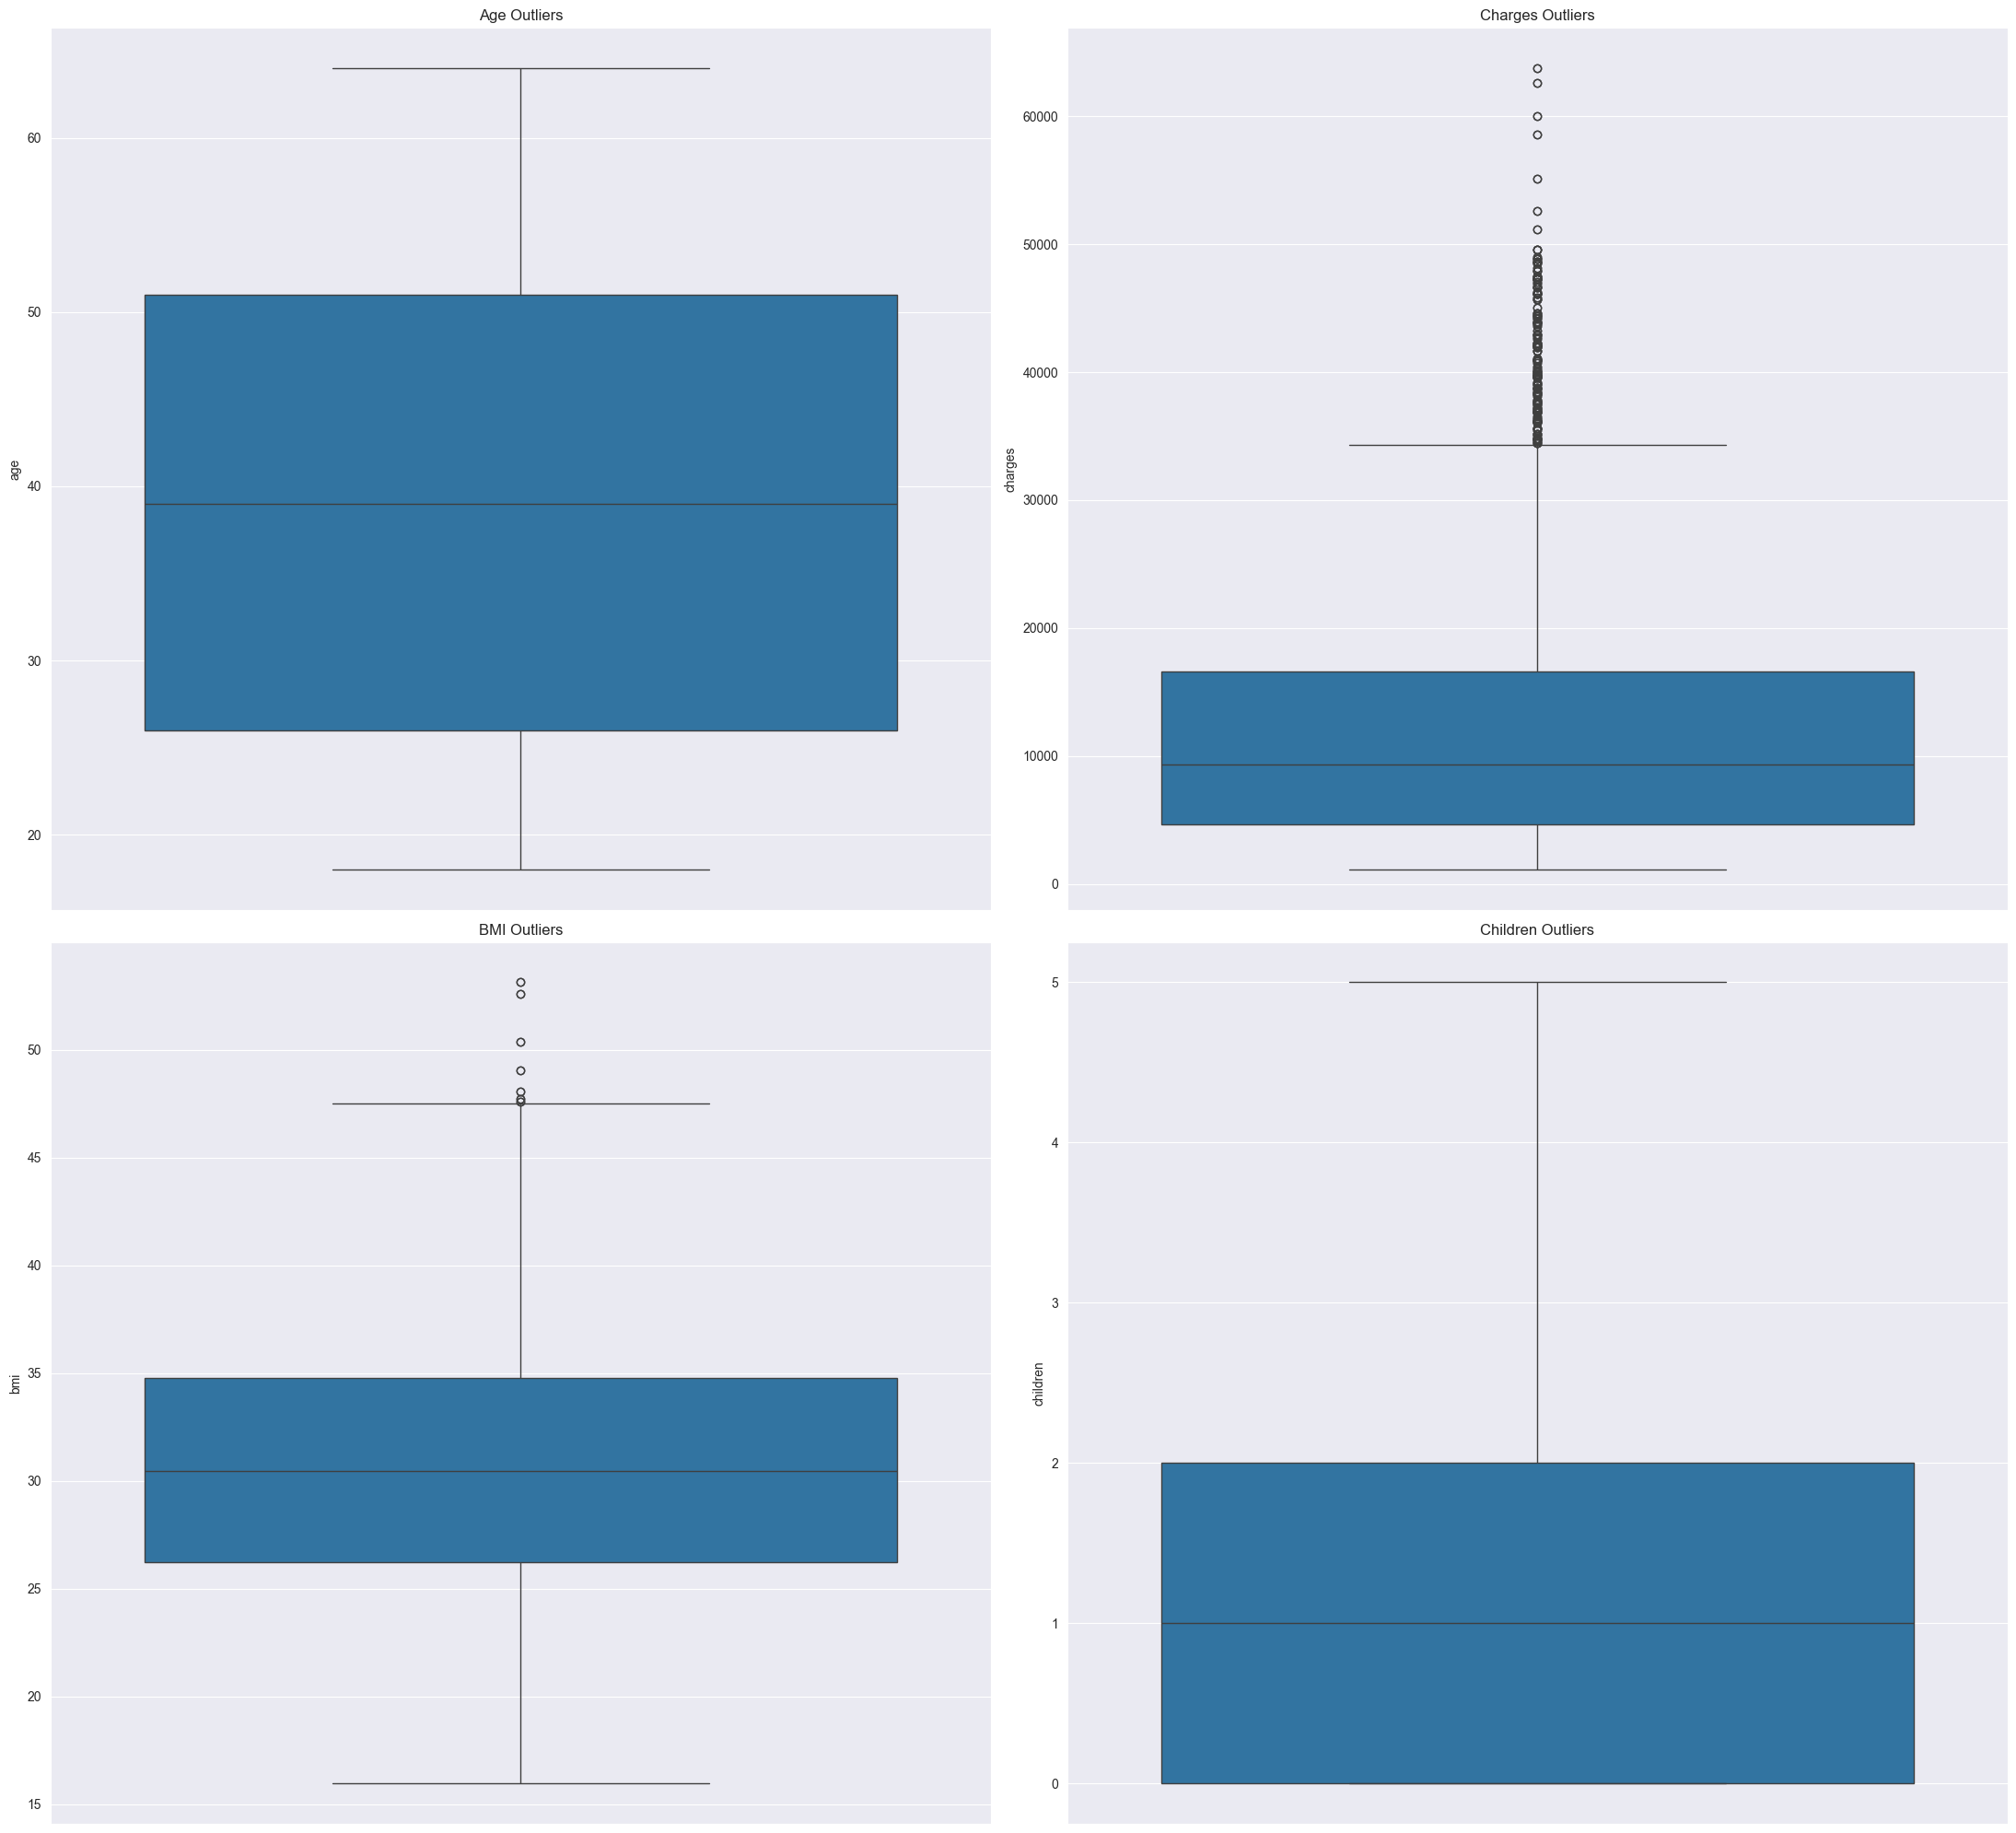

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(22, 20))

# First plot
sns.boxplot(medical_insurance_df["age"],ax=axes[0,0])
axes[0,0].set_title("Age Outliers")

# Second plot
sns.boxplot(medical_insurance_df["charges"],ax=axes[0,1])
axes[0,1].set_title("Charges Outliers")

# Third plot
sns.boxplot(medical_insurance_df["bmi"],ax=axes[1,0])
axes[1,0].set_title("BMI Outliers")

# fourth plot
sns.boxplot(medical_insurance_df["children"],ax=axes[1,1])
axes[1,1].set_title("Children Outliers")

plt.tight_layout()
plt.show()

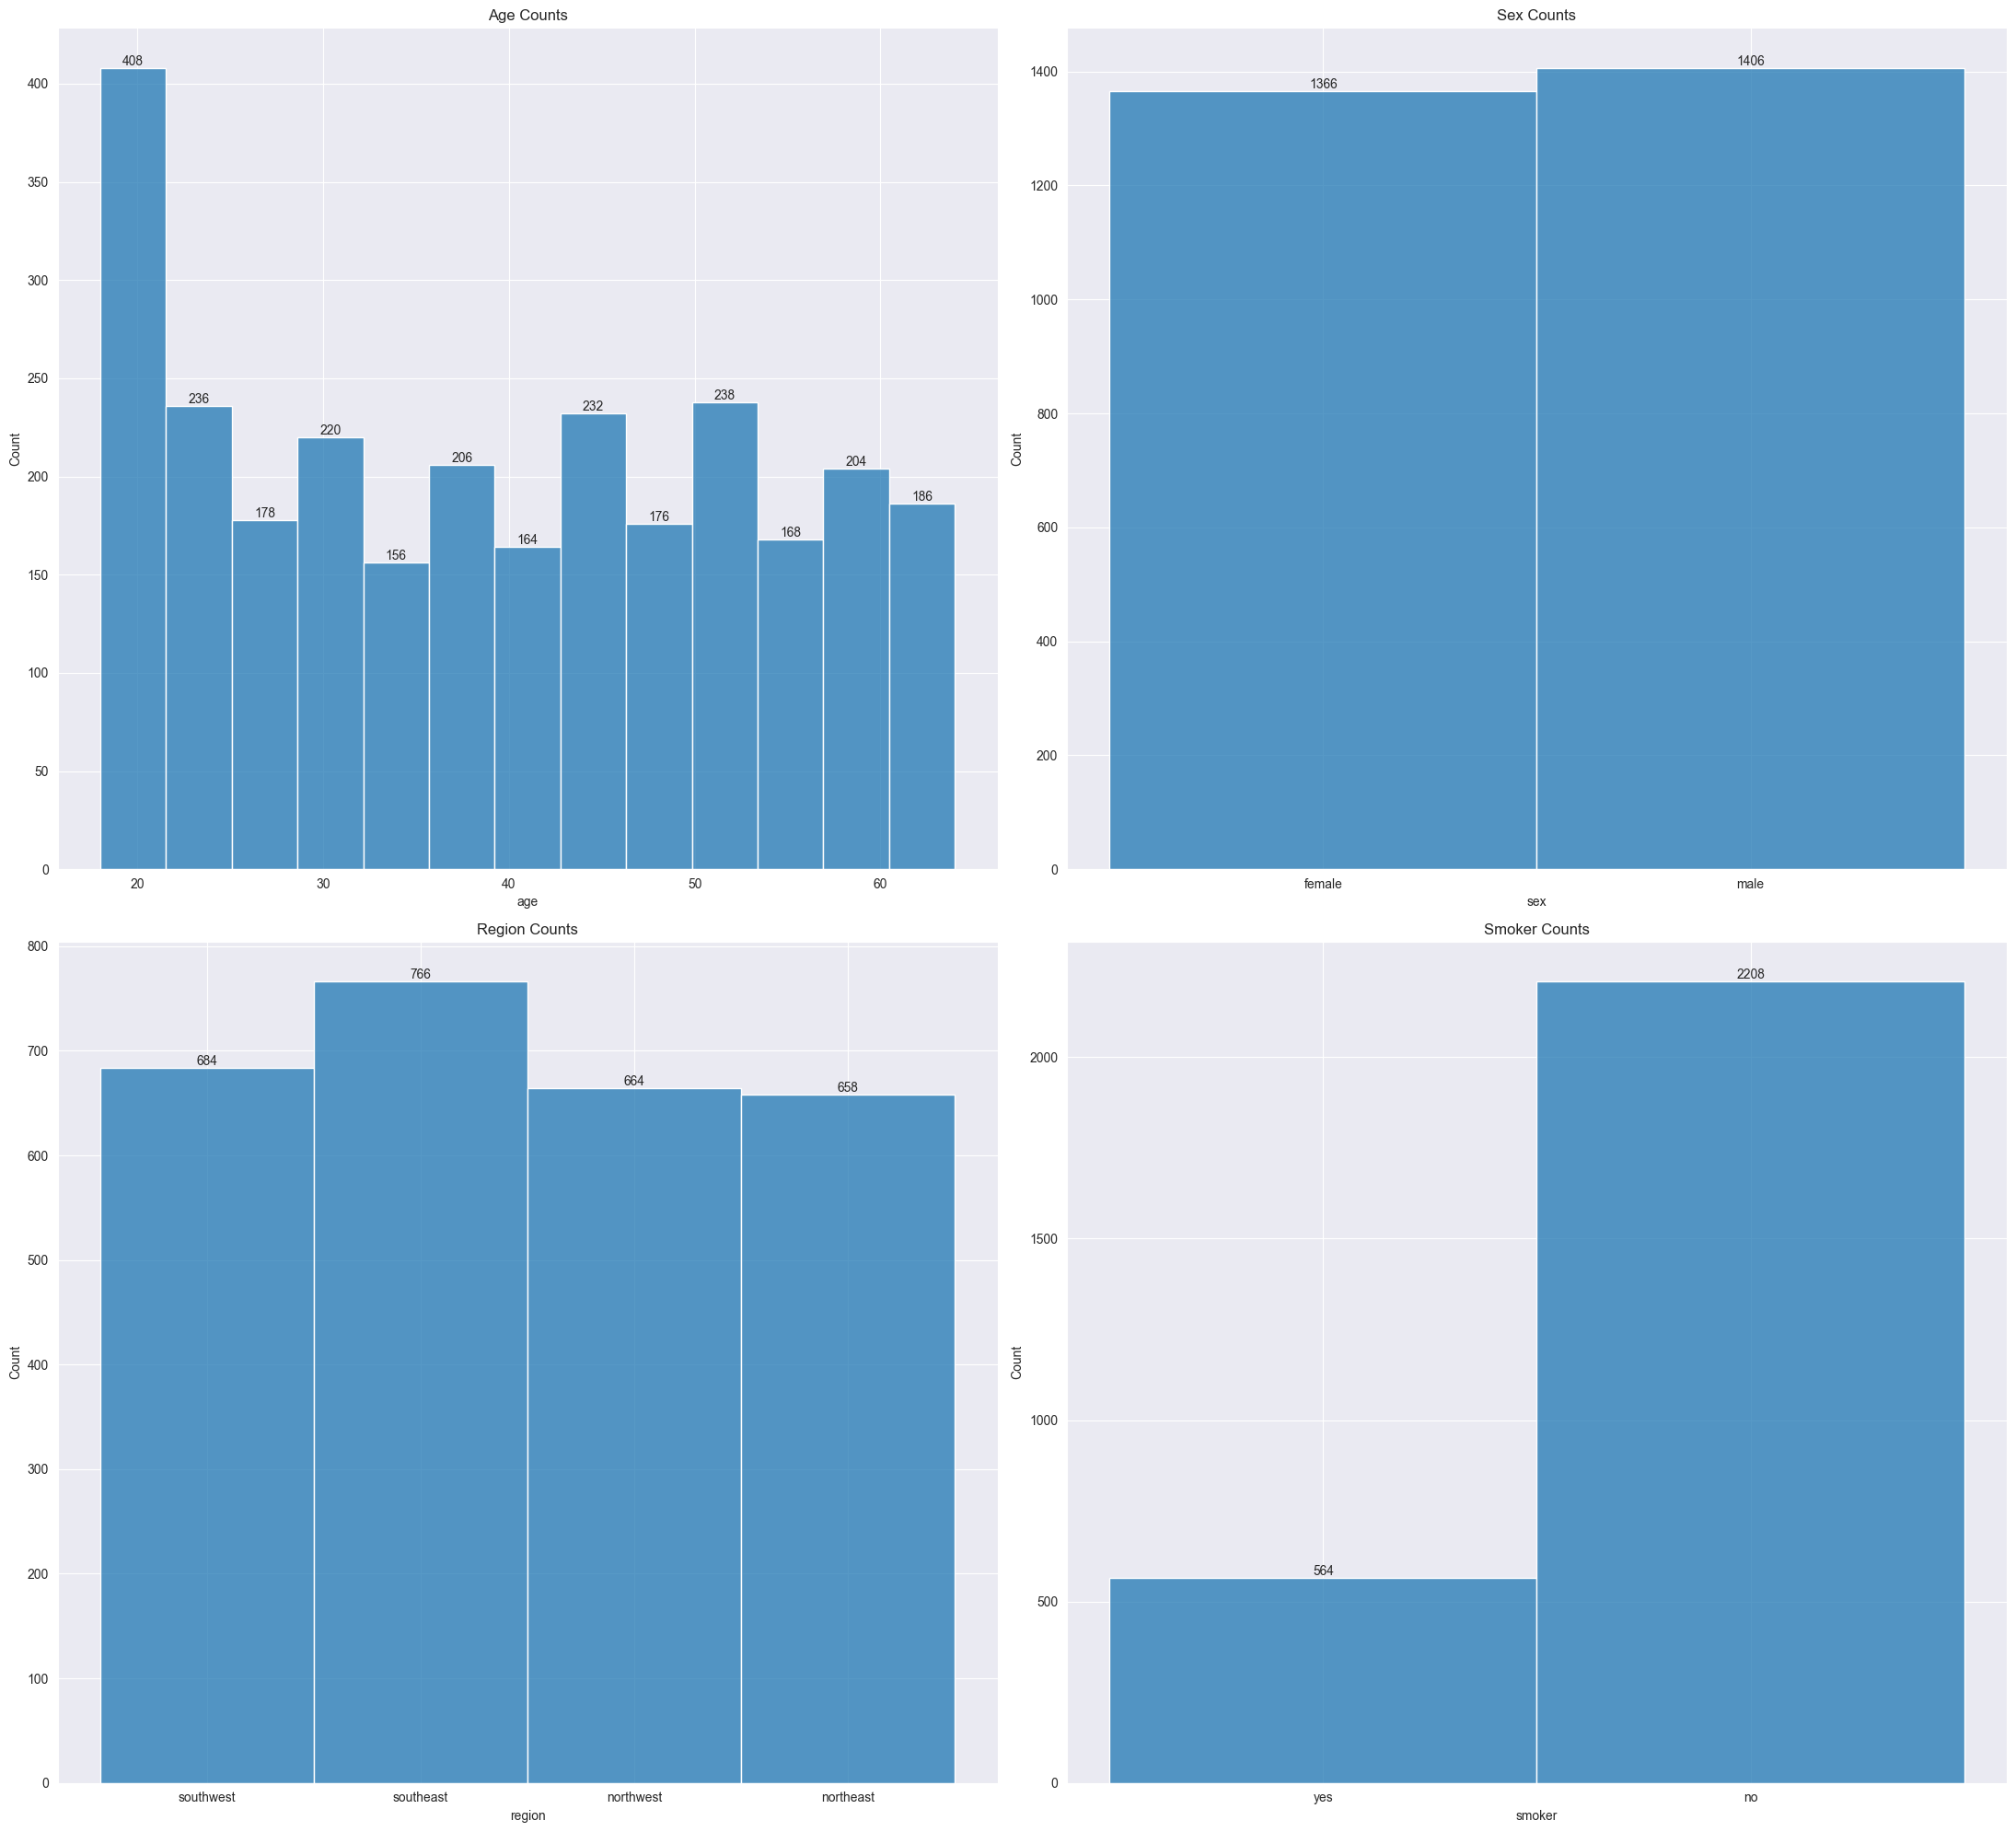

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(22, 20))

# First plot
sns.histplot(medical_insurance_df["age"],ax=axes[0,0])
axes[0,0].set_title("Age Counts")
axes[0,0].bar_label(axes[0,0].containers[0])

# Second plot
sns.histplot(medical_insurance_df["sex"],ax=axes[0,1])
axes[0,1].set_title("Sex Counts")
axes[0,1].bar_label(axes[0,1].containers[0])

# Third plot
sns.histplot(medical_insurance_df["region"],ax=axes[1,0])
axes[1,0].set_title("Region Counts")
axes[1,0].bar_label(axes[1,0].containers[0])

# fourth plot
sns.histplot(medical_insurance_df["smoker"],ax=axes[1,1])
axes[1,1].set_title("Smoker Counts")
axes[1,1].bar_label(axes[1,1].containers[0])

plt.tight_layout()
plt.show()

In [9]:
medical_insurance_df["children"].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

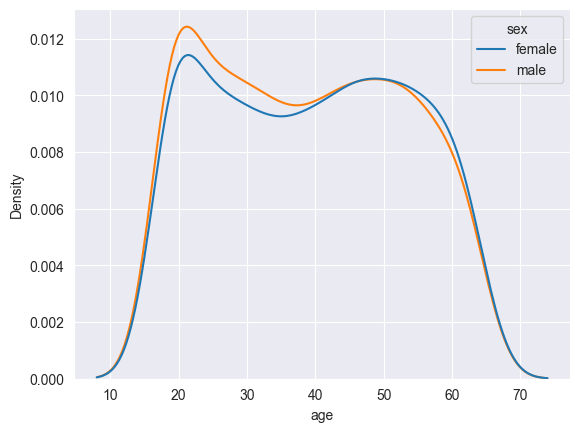

In [10]:
sns.kdeplot(x=medical_insurance_df["age"],hue=medical_insurance_df["sex"])

<Axes: xlabel='charges', ylabel='age'>

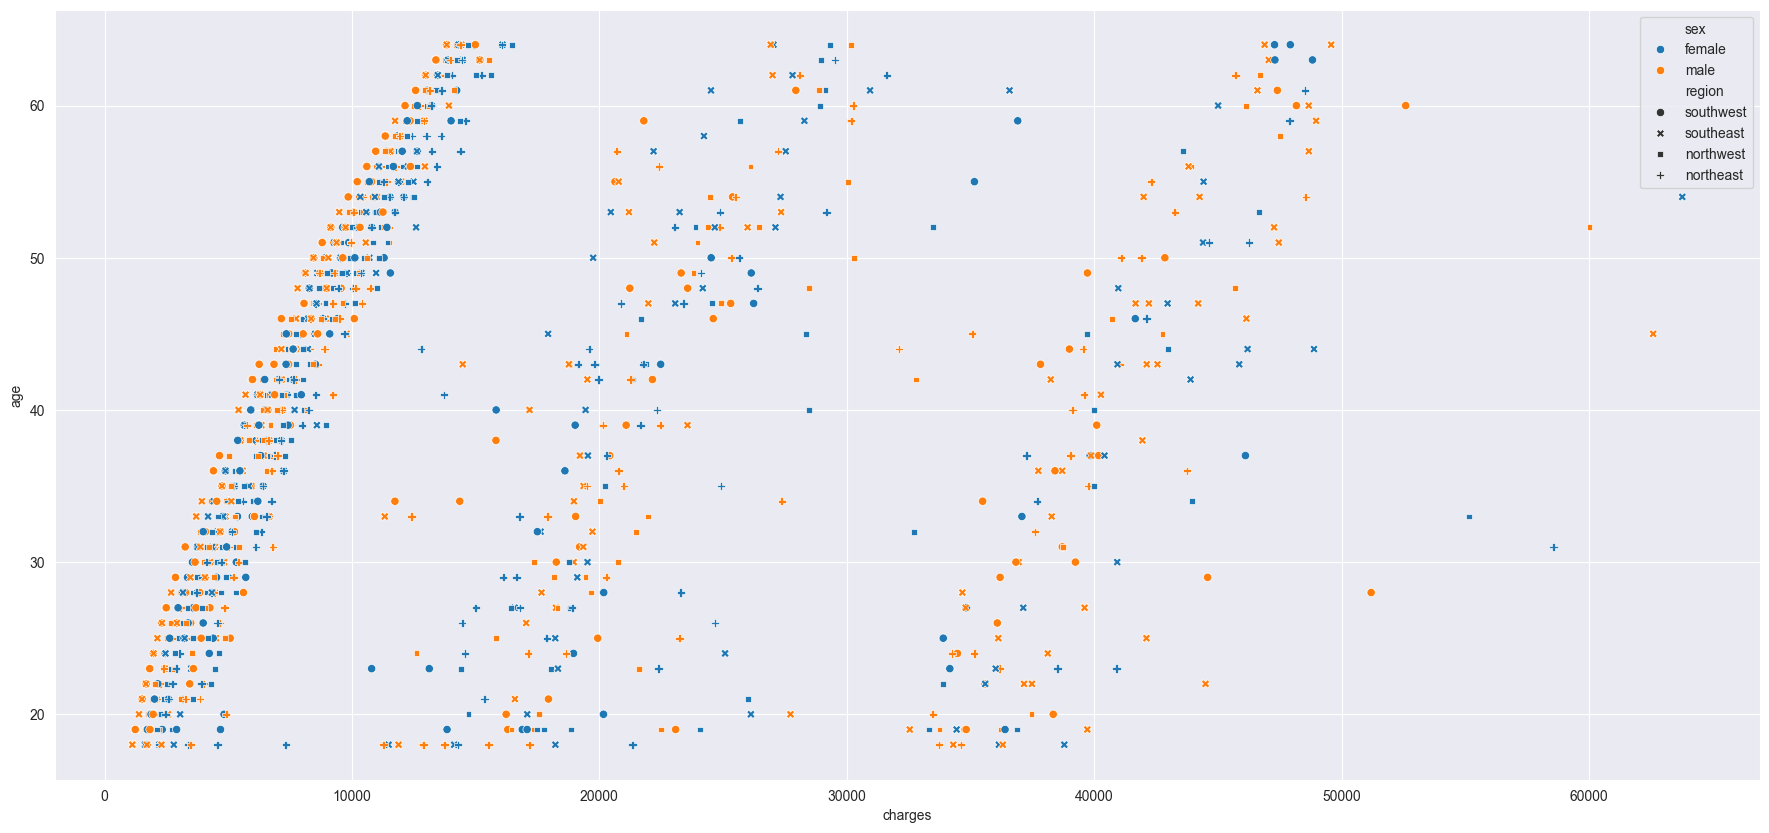

In [11]:
plt.figure(figsize=(22, 10))
sns.scatterplot(x=medical_insurance_df["charges"],y= medical_insurance_df['age'],hue=medical_insurance_df["sex"],style=medical_insurance_df["region"])

<Axes: xlabel='children', ylabel='charges'>

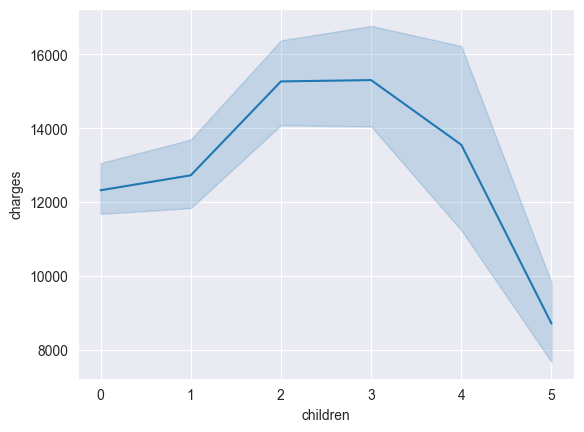

In [12]:
sns.lineplot(x=medical_insurance_df["children"], y=medical_insurance_df["charges"])

Pre - Processing

In [13]:
le = LabelEncoder()
medical_insurance_df["sex"] = le.fit_transform(medical_insurance_df["sex"])
sex_dict = (dict(zip(le.classes_, le.transform(le.classes_))))
medical_insurance_df["smoker"] = le.fit_transform(medical_insurance_df["smoker"])
smoker_dict = (dict(zip(le.classes_, le.transform(le.classes_))))
medical_insurance_df["region"] = le.fit_transform(medical_insurance_df["region"])
region_dict = (dict(zip(le.classes_, le.transform(le.classes_))))

print(f"{sex_dict}\n{smoker_dict}\n{region_dict}")

{'female': np.int64(0), 'male': np.int64(1)}
{'no': np.int64(0), 'yes': np.int64(1)}
{'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


In [14]:
def predict (age,sex,bmi,children,smoker,region):
    age = age
    sex = sex_dict[sex]
    bmi = bmi
    children = children
    smoker = smoker_dict[smoker]
    region = region_dict[region]
    return [[age,sex,bmi,children,smoker,region]]

result = predict(10,'male',30,3,'yes','northwest')
print(result)

[[10, np.int64(1), 30, 3, np.int64(1), np.int64(1)]]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error, r2_score

# --------------------------
# Load your dataset
# --------------------------
# Assuming df is already loaded with columns:
# ['age','sex','bmi','children','smoker','region','charges']

X = medical_insurance_df.drop("charges", axis=1)
Y = medical_insurance_df["charges"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
new_input = [X.values[0, :]]   # convert to NumPy and get first row



# --------------------------
# 1. Liner Regression
# --------------------------
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print("Liner Regression:")
print("MSE:", mean_squared_error(y_test, lr_pred))
print("RMSE:", root_mean_squared_error(y_test, lr_pred))
print("R²:", r2_score(y_test, lr_pred))
print("Test:",lr.predict(new_input) )
print("-"*40)

# --------------------------
# 2. Polynomial Regression
# --------------------------
pf = PolynomialFeatures(4)
x1 = pf.fit_transform(X_train)
x2 = pf.transform(X_test)

lr=LinearRegression()
lr.fit(x1,y_train)
lr_pred = lr.predict(x2)

new_input_poly = pf.transform(new_input)
prediction = lr.predict(new_input_poly)


print("Polynomial Regression:")
print("MSE:", mean_squared_error(y_test, lr_pred))
print("RMSE:", root_mean_squared_error(y_test, lr_pred))
print("R²:", r2_score(y_test, lr_pred))
print("Test:",prediction)
print("-"*40)

# --------------------------
# 3. Lasso Regression
# --------------------------
l = Lasso()
l.fit(X_train,y_train)
l.score(X_test,y_test)
l_pred = l.predict(X_test)
print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, l_pred))
print("RMSE:", root_mean_squared_error(y_test, l_pred))
print("R²:", r2_score(y_test, l_pred))
print("Test:",l.predict(new_input) )
print("-"*40)

# --------------------------
# 4. Ridge Regression
# --------------------------
r = Ridge()
r.fit(X_train,y_train)
r.score(X_test,y_test)
r_pred = r.predict(X_test)
print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, r_pred))
print("RMSE:", root_mean_squared_error(y_test, r_pred))
print("R²:", r2_score(y_test, r_pred))
print("Test:",r.predict(new_input) )
print("-"*40)

# --------------------------
# 5. ElasticNet Regression
# --------------------------
e = ElasticNet()
e.fit(X_train,y_train)
e.score(X_test,y_test)
e_pred = e.predict(X_test)
print("ElasticNet Regression:")
print("MSE:", mean_squared_error(y_test, e_pred))
print("RMSE:", root_mean_squared_error(y_test, e_pred))
print("R²:", r2_score(y_test, e_pred))
print("Test:",e.predict(new_input) )
print("-"*40)

# --------------------------
# 6. Support Vector Regression
# --------------------------
scr = SVR()
scr.fit(X_train,y_train)
scr.score(X_test,y_test)
scr_pred = scr.predict(X_test)
print("Support Vector Regression:")
print("MSE:", mean_squared_error(y_test, scr_pred))
print("RMSE:", root_mean_squared_error(y_test, scr_pred))
print("R²:", r2_score(y_test, scr_pred))
print("Test:",scr.predict(new_input) )
print("-"*40)

# --------------------------
# 7. Decision Tree
# --------------------------
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree:")
print("MSE:", mean_squared_error(y_test, dt_pred))
print("RMSE:", root_mean_squared_error(y_test, dt_pred))
print("R²:", r2_score(y_test, dt_pred))
print("Test:",dt.predict(new_input) )
print("-"*40)

# --------------------------
# 8. Random Forest
# --------------------------
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest:")
print("MSE:", mean_squared_error(y_test, rf_pred))
print("RMSE:", root_mean_squared_error(y_test, rf_pred))
print("R²:", r2_score(y_test, rf_pred))
print("Test:",rf.predict(new_input) )
print("-"*40)

# --------------------------
# 9. Gradient Boosting
# --------------------------
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("Gradient Boosting:")
print("MSE:", mean_squared_error(y_test, gb_pred))
print("RMSE:", root_mean_squared_error(y_test, gb_pred))
print("R²:", r2_score(y_test, gb_pred))
print("Test:",gb.predict(new_input) )

Liner Regression:
MSE: 39922479.35435014
RMSE: 6318.423803002624
R²: 0.7398864322395977
Test: [25099.07077262]
----------------------------------------
Polynomial Regression:
MSE: 26763067.07593973
RMSE: 5173.303304073687
R²: 0.825626139109642
Test: [21745.69098777]
----------------------------------------
Lasso Regression:
MSE: 39923978.66109876
RMSE: 6318.54244751895
R²: 0.7398766635570444
Test: [25094.13915476]
----------------------------------------
Ridge Regression:
MSE: 39933929.69888947
RMSE: 6319.329845710657
R²: 0.7398118279059396
Test: [25046.6170465]
----------------------------------------
ElasticNet Regression:
MSE: 90728507.9231802
RMSE: 9525.151333347949
R²: 0.4088614666437346
Test: [11302.85895042]
----------------------------------------


C:\Users\shogi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\shogi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\shogi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\shogi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packag

Support Vector Regression:
MSE: 164380800.86574566
RMSE: 12821.107630222346
R²: -0.0710175639390056
Test: [9098.54056111]
----------------------------------------
Decision Tree:
MSE: 21791960.375448022
RMSE: 4668.185983382413
R²: 0.858015217155258
Test: [17149.66355882]
----------------------------------------


C:\Users\shogi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shogi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Random Forest:
MSE: 9590180.67620957
RMSE: 3096.8016849985033
R²: 0.937515501253959
Test: [16911.18085898]
----------------------------------------


C:\Users\shogi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Gradient Boosting:
MSE: 16573568.71882712
RMSE: 4071.0648138818815
R²: 0.8920154719923081
Test: [18580.55716245]


C:\Users\shogi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ML FLow and Version Control

In [16]:
import mlflow

In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [17]:
def model_test(models, x_train, y_train, x_test, y_test,):
    mlflow.set_experiment("Medical Insurance Charges ML Model")

    results = []
    for model in models:
        model_name = model.__class__.__name__
        params = model.get_params()
        model.fit(x_train, y_train)
        pred = model.predict(x_test)

        mse = mean_squared_error(y_test, pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, pred)

        results.append({
            "Model": model_name,
            "Para" : params,
            "MSE": mse,
            "RMSE": rmse,
            "R2": r2
        })
        with mlflow.start_run(run_name=model_name, nested=True):
            # log all params
            for key, value in params.items():
                mlflow.log_param(key, value)

            # log metrics
            mlflow.log_metric("MSE", mse)
            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("R2", r2)

            # log model itself
            mlflow.sklearn.log_model(model, artifact_path=model_name)

    return pd.DataFrame(results)

In [18]:
LinearRegressionPara = {}
LassoPara = {}
RidgePara = {}
ElasticNetPara = {}
SVRPara = {}
DecisionTreeRegressorPara = {
    'max_depth' : 4,
    'random_state' : 42}
RandomForestRegressorPara = {
    'n_estimators' : 100,
    'max_depth' : 4,
    'random_state' : 42}
GradientBoostingRegressorPara = {
    'n_estimators' : 100,
    'learning_rate' : 0.05,
    'max_depth' : 4,
    'random_state' : 42}

In [19]:
models = (
    LinearRegression(**LinearRegressionPara),
    Lasso(**LassoPara),
    Ridge(**RidgePara),
    ElasticNet(**ElasticNetPara),
    SVR(**SVRPara),
    DecisionTreeRegressor(**DecisionTreeRegressorPara),
    RandomForestRegressor(**RandomForestRegressorPara),
    GradientBoostingRegressor(**GradientBoostingRegressorPara)
)

In [23]:
results_df = model_test(models, X_train, y_train, X_test, y_test)
print(results_df)

2025/08/28 10:26:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 10:26:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LinearRegression at: http://127.0.0.1:5000/#/experiments/475340755779516642/runs/9d5c403df29345928c7d0827ec4d70dd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/475340755779516642


2025/08/28 10:26:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 10:26:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Lasso at: http://127.0.0.1:5000/#/experiments/475340755779516642/runs/5b69de0502144af7826befe3f73ac362
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/475340755779516642


2025/08/28 10:26:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 10:26:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Ridge at: http://127.0.0.1:5000/#/experiments/475340755779516642/runs/b59fb5e07a5c40af8977e9f024d16d33
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/475340755779516642


2025/08/28 10:26:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 10:26:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ElasticNet at: http://127.0.0.1:5000/#/experiments/475340755779516642/runs/06ea08854a8b4deb91407e3073a2f2e1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/475340755779516642


2025/08/28 10:26:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 10:26:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVR at: http://127.0.0.1:5000/#/experiments/475340755779516642/runs/c7fa5c4b6ca6460d8f73b3df08960a08
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/475340755779516642


2025/08/28 10:26:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 10:26:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DecisionTreeRegressor at: http://127.0.0.1:5000/#/experiments/475340755779516642/runs/e4fbfad6b0074511b73fb35c24efc8eb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/475340755779516642


2025/08/28 10:26:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 10:26:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestRegressor at: http://127.0.0.1:5000/#/experiments/475340755779516642/runs/38a3bc90cf124064bd95a848488fd3b8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/475340755779516642


2025/08/28 10:26:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 10:26:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingRegressor at: http://127.0.0.1:5000/#/experiments/475340755779516642/runs/87f6595160144b41b9f1abe82d4bea4b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/475340755779516642
                       Model  \
0           LinearRegression   
1                      Lasso   
2                      Ridge   
3                 ElasticNet   
4                        SVR   
5      DecisionTreeRegressor   
6      RandomForestRegressor   
7  GradientBoostingRegressor   

                                                Para           MSE  \
0  {'copy_X': True, 'fit_intercept': True, 'n_job...  3.992248e+07   
1  {'alpha': 1.0, 'copy_X': True, 'fit_intercept'...  3.992398e+07   
2  {'alpha': 1.0, 'copy_X': True, 'fit_intercept'...  3.993393e+07   
3  {'alpha': 1.0, 'copy_X': True, 'fit_intercept'...  9.072851e+07   
4  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...  1.643808e+08   
5  {'ccp_alpha': 0.0, 'criterion': 'squared_error...  2.312397e+07   
6  {'boots

Converted to Model

In [33]:
run_id = "fff7cb11eab14f588205dbc36a240518"
model_name = "DecisionTreeRegressor"
model_uri = f"runs:/{run_id}/{model_name}"

# Register model into the MLflow Model Registry
with mlflow.start_run(run_id=run_id, nested=True):
    mlflow.register_model(model_uri=model_uri, name=model_name)

Successfully registered model 'DecisionTreeRegressor'.
2025/08/28 10:41:12 WARNING mlflow.tracking._model_registry.fluent: Run with id fff7cb11eab14f588205dbc36a240518 has no artifacts at artifact path 'DecisionTreeRegressor', registering model based on models:/m-dedc2805a0994130b2efcde4c5f73771 instead
2025/08/28 10:41:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTreeRegressor, version 1
Created version '1' of model 'DecisionTreeRegressor'.


🏃 View run DecisionTreeRegressor at: http://127.0.0.1:5000/#/experiments/475340755779516642/runs/fff7cb11eab14f588205dbc36a240518
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/475340755779516642


Prediction

In [34]:
import mlflow.pyfunc

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/1")

In [35]:
y_pred = model.predict([[20,1,30,2,1,3]])
y_pred

C:\Users\shogi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([19307.11836222])

Model to Production

In [37]:
current_model_uri = f"models:/{model_name}/1"
production_model_name = "DecisionTreeRegressor"

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri,dst_name=production_model_name)

Registered model 'DecisionTreeRegressor' already exists. Creating a new version of this model...
Copied version '1' of model 'DecisionTreeRegressor' to version '2' of model 'DecisionTreeRegressor'.


<ModelVersion: aliases=[], creation_timestamp=1756358321104, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1756358321104, metrics=None, model_id=None, name='DecisionTreeRegressor', params=None, run_id='fff7cb11eab14f588205dbc36a240518', run_link='', source='models:/DecisionTreeRegressor/1', status='READY', status_message=None, tags={}, user_id='', version='2'>

Streamlit Application

In [27]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

medical_insurance_df = pd.read_csv(r"C:\Users\shogi\Desktop\DS\02_Project\03_MedicalInsurance\medical_insurance.csv")

le = LabelEncoder()
medical_insurance_df["sex"] = le.fit_transform(medical_insurance_df["sex"])
sex_dict = (dict(zip(le.classes_, le.transform(le.classes_))))
medical_insurance_df["smoker"] = le.fit_transform(medical_insurance_df["smoker"])
smoker_dict = (dict(zip(le.classes_, le.transform(le.classes_))))
medical_insurance_df["region"] = le.fit_transform(medical_insurance_df["region"])
region_dict = (dict(zip(le.classes_, le.transform(le.classes_))))


def predict (age,sex,bmi,children,smoker,region):
    age = age
    sex = sex_dict[sex]
    bmi = bmi
    children = children
    smoker = smoker_dict[smoker]
    region = region_dict[region]
    return [[age,sex,bmi,children,smoker,region]]

X = medical_insurance_df.drop("charges", axis=1)
Y = medical_insurance_df["charges"]

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X, Y)

st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Project Introduction","Exploratory Data Analysis",
                                  "Bivariate Analysis", "Multivariate Analysis",
                                  "Outlier Detection", "Correlation Analysis",
                                  "Prediction", "Creator Info"])


if page == "Project Introduction":
    st.title("Project Introduction")
    st.subheader("📊 A Streamlit App for Exploring Medical Insurance Cost Prediction")
    st.write("""
    This project analyzes Medical Insurance Cost Prediction.

    It provides visualizations for Medical Insurance Cost Prediction

    **Features:**
    - Generate dynamic visualizations.
    - ●	Assisting insurance companies in determining personalized insurance premiums.
    - ●	Helping individuals plan and compare medical insurance policies based on their profile.
    - ●	Supporting healthcare consultants in estimating out-of-pocket medical costs.
    - ●	Providing cost transparency and increasing financial awareness among policyholders.


    **Database Used:**
    1.  Dataset       : https://drive.google.com/file/d/1_ul1s5xIjjAMMmu7_OVJVFwFfSI5uwEh/view?usp=sharing
    """)

elif page == "Exploratory Data Analysis":
    st.title("Exploratory Data Analysis")

    # 1. Distribution of medical insurance charges
    st.subheader("1. Distribution of Medical Insurance Charges")
    fig1, ax1 = plt.subplots()
    sns.histplot(medical_insurance_df["charges"], kde=True, ax=ax1)
    ax1.set_xlabel("Charges")
    ax1.set_ylabel("Count")
    st.pyplot(fig1)

    # 2. Age distribution
    st.subheader("2. Age Distribution of Individuals")
    fig2, ax2 = plt.subplots()
    sns.histplot(medical_insurance_df["age"], bins=20, kde=True, ax=ax2)
    ax2.set_xlabel("Age")
    ax2.set_ylabel("Count")
    st.pyplot(fig2)

    # 3. Smokers vs Non-Smokers
    st.subheader("3. Smokers vs Non-Smokers")
    fig3, ax3 = plt.subplots()
    sns.countplot(x="smoker", data=medical_insurance_df, ax=ax3)
    ax3.bar_label(ax3.containers[0])
    plt.xticks(list(smoker_dict.values()), list(smoker_dict.keys()))
    ax3.set_xlabel("Smoker")
    ax3.set_ylabel("Count")
    st.pyplot(fig3)

    # 4. Average BMI
    st.subheader("4. Average BMI in the Dataset")
    avg_bmi = medical_insurance_df["bmi"].mean()
    st.metric("Average BMI", f"{avg_bmi:.2f}")

    # 5. Regions with most policyholders
    st.subheader("5. Number of Policyholders by Region")
    fig5, ax5 = plt.subplots()
    sns.countplot(x="region", data=medical_insurance_df, ax=ax5)
    ax5.set_xlabel("Region")
    ax5.set_ylabel("Count")
    st.pyplot(fig5)

elif page == "Bivariate Analysis":
    st.title("Bivariate Analysis")
    # 1. Charges vs Age
    st.subheader("1. How do charges vary with age?")
    fig1, ax1 = plt.subplots()
    sns.scatterplot(x="age", y="charges", hue="smoker", data=medical_insurance_df, ax=ax1)
    smoker_dict_rev = {v: k for k, v in smoker_dict.items()}
    handles, labels = ax1.get_legend_handles_labels()
    new_labels = [smoker_dict_rev[int(l)] for l in labels]
    ax1.legend(handles, new_labels, title="Smoker",loc="upper left")
    ax1.set_xlabel("Age")
    ax1.set_ylabel("Charges")
    st.pyplot(fig1)

    # 2. Charges between smokers and non-smokers
    st.subheader("2. Average charges: Smokers vs Non-Smokers")
    fig2, ax2 = plt.subplots()
    sns.barplot(x="smoker", y="charges", data=medical_insurance_df, estimator="mean", ax=ax2)
    plt.xticks(list(smoker_dict.values()), list(smoker_dict.keys()))
    ax2.bar_label(ax2.containers[0])
    ax2.set_xlabel("Smoker")
    ax2.set_ylabel("Average Charges")
    st.pyplot(fig2)

    avg_charges_smokers = medical_insurance_df[medical_insurance_df["smoker"]==smoker_dict["yes"]]["charges"].mean()
    avg_charges_nonsmokers = medical_insurance_df[medical_insurance_df["smoker"]==smoker_dict["no"]]["charges"].mean()
    st.metric("Avg Charges (Smokers)", f"{avg_charges_smokers:,.2f}")
    st.metric("Avg Charges (Non-Smokers)", f"{avg_charges_nonsmokers:,.2f}")

    # 3. Does BMI impact charges?
    st.subheader("3. Does BMI impact insurance charges?")
    fig3, ax3 = plt.subplots()
    sns.scatterplot(x="bmi", y="charges", hue="smoker", data=medical_insurance_df, ax=ax3)
    ax3.set_xlabel("BMI")
    ax3.set_ylabel("Charges")
    st.pyplot(fig3)

    # 4. Gender vs Charges
    st.subheader("4. Do men or women pay more on average?")
    fig4, ax4 = plt.subplots()
    sns.barplot(x="sex", y="charges", data=medical_insurance_df, estimator="mean", ax=ax4)
    ax4.set_xlabel("Gender")
    ax4.set_ylabel("Average Charges")
    st.pyplot(fig4)

    avg_male = medical_insurance_df[medical_insurance_df["sex"]==sex_dict["male"]]["charges"].mean()
    avg_female = medical_insurance_df[medical_insurance_df["sex"]==sex_dict["female"]]["charges"].mean()
    st.metric("Avg Charges (Male)", f"{avg_male:,.2f}")
    st.metric("Avg Charges (Female)", f"{avg_female:,.2f}")

    # 5. Correlation: children vs charges
    st.subheader("5. Correlation between number of children and insurance charges")
    fig5, ax5 = plt.subplots()
    sns.boxplot(x="children", y="charges", data=medical_insurance_df, ax=ax5)
    ax5.set_xlabel("Number of Children")
    ax5.set_ylabel("Charges")
    st.pyplot(fig5)

    correlation = medical_insurance_df["children"].corr(medical_insurance_df["charges"])
    st.write(f"📌 Correlation coefficient between children and charges: **{correlation:.2f}**")

elif page == "Multivariate Analysis":

    st.title("📊 Multivariate Analysis of Medical Insurance Charges")

    # 1. Smoking + Age vs Charges
    st.subheader("1. How does smoking status combined with age affect medical charges?")
    fig1, ax1 = plt.subplots()
    sns.scatterplot(x="age", y="charges", hue="smoker", style="sex", data=medical_insurance_df, ax=ax1)
    ax1.set_xlabel("Age")
    ax1.set_ylabel("Charges")
    st.pyplot(fig1)

    # 2. Gender & Region impact on charges (for smokers only)
    st.subheader("2. Impact of gender and region on charges for smokers")
    smokers_df = medical_insurance_df[medical_insurance_df["smoker"] == smoker_dict["yes"]]
    fig2, ax2 = plt.subplots(figsize=(8,5))
    sns.boxplot(x="region", y="charges", hue="sex", data=smokers_df, ax=ax2)
    ax2.set_xlabel("Region")
    ax2.set_ylabel("Charges")
    st.pyplot(fig2)

    # 3. Age, BMI, Smoking together
    st.subheader("3. How do age, BMI, and smoking status together affect charges?")
    fig3, ax3 = plt.subplots(figsize=(8,5))
    sns.scatterplot(x="bmi", y="charges", hue="smoker", size="age", data=medical_insurance_df, ax=ax3, sizes=(20,200))
    ax3.set_xlabel("BMI")
    ax3.set_ylabel("Charges")
    st.pyplot(fig3)

    # 4. Obese smokers vs non-obese non-smokers
    st.subheader("4. Do obese smokers (BMI > 30) pay more than non-obese non-smokers?")
    medical_insurance_df["group"] = "Other"
    medical_insurance_df.loc[(medical_insurance_df["smoker"]==smoker_dict["yes"]) & (medical_insurance_df["bmi"]>30), "group"] = "Obese Smoker"
    medical_insurance_df.loc[(medical_insurance_df["smoker"]==smoker_dict["yes"]) & (medical_insurance_df["bmi"]<=30), "group"] = "Non-Obese Smoker"
    medical_insurance_df.loc[(medical_insurance_df["smoker"]==smoker_dict["no"]) & (medical_insurance_df["bmi"]>30), "group"] = "Obese Non-Smoker"
    medical_insurance_df.loc[(medical_insurance_df["smoker"]==smoker_dict["no"]) & (medical_insurance_df["bmi"]<=30), "group"] = "Non-Obese Non-Smoker"

    fig4, ax4 = plt.subplots(figsize=(15, 8))
    sns.boxplot(x="group", y="charges", data=medical_insurance_df, ax=ax4)
    ax4.set_xlabel("Group")
    ax4.set_ylabel("Charges")
    st.pyplot(fig4)

    # Show group averages
    avg_obese_smoker = medical_insurance_df[medical_insurance_df["group"]=="Obese Smoker"]["charges"].mean()
    avg_nonobese_smoker = medical_insurance_df[medical_insurance_df["group"]=="Non-Obese Smoker"]["charges"].mean()
    avg_obese_nonsmoker = medical_insurance_df[medical_insurance_df["group"]=="Obese Non-Smoker"]["charges"].mean()
    avg_nonobese_nonsmoker = medical_insurance_df[medical_insurance_df["group"]=="Non-Obese Non-Smoker"]["charges"].mean()

    st.metric("Avg Charges (Obese Smokers)", f"{avg_obese_smoker:,.2f}")
    st.metric("Avg Charges (Non-Obese Smokers)", f"{avg_nonobese_smoker:,.2f}")
    st.metric("Avg Charges (Obese Non-Smokers)", f"{avg_obese_nonsmoker:,.2f}")
    st.metric("Avg Charges (Non-Obese Non-Smokers)", f"{avg_nonobese_nonsmoker:,.2f}")

elif page == "Outlier Detection":
    st.title("📊 Outlier Detection in Medical Insurance Dataset")

    # 1. Outliers in Charges
    st.subheader("1. Outliers in Charges")

    fig1, ax1 = plt.subplots()
    sns.boxplot(y="charges", data=medical_insurance_df, ax=ax1)
    ax1.set_ylabel("Charges")
    st.pyplot(fig1)

    # Show top individuals paying highest charges
    top_charges = medical_insurance_df.sort_values(by="charges", ascending=False).head(10)
    st.write("💰 Top 10 Individuals with Highest Charges:")
    st.dataframe(top_charges)

    # 2. Outliers in BMI
    st.subheader("2. Outliers in BMI")

    fig2, ax2 = plt.subplots()
    sns.boxplot(y="bmi", data=medical_insurance_df, ax=ax2)
    ax2.set_ylabel("BMI")
    st.pyplot(fig2)

    # Show extreme BMI values
    q1, q3 = medical_insurance_df["bmi"].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    extreme_bmi = medical_insurance_df[(medical_insurance_df["bmi"] < lower_bound) | (medical_insurance_df["bmi"] > upper_bound)]
    st.write("⚠️ Extreme BMI Values (Potential Outliers):")
    st.dataframe(extreme_bmi)

elif page == "Correlation Analysis":

    st.title("📊 Correlation Analysis of Medical Insurance Data")

    # 1. Correlation matrix (numeric features only)
    st.subheader("1. Correlation between numeric features")
    numeric_cols = ["age", "bmi", "children", "charges"]
    corr = medical_insurance_df[numeric_cols].corr()

    fig1, ax1 = plt.subplots()
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, ax=ax1)
    st.pyplot(fig1)

    # 2. Strongest correlation with charges
    st.subheader("2. Which features are most correlated with charges?")
    charges_corr = corr["charges"].drop("charges").sort_values(ascending=False)
    st.write(charges_corr)

    # Highlight the strongest correlation
    strongest_feature = charges_corr.idxmax()
    strongest_value = charges_corr.max()
    st.success(f"📌 The feature most strongly correlated with charges is **{strongest_feature}** (correlation = {strongest_value:.2f}).")

elif page == "Prediction":
    st.title("Prediction")
    st.subheader("Prediction for Random Forest")
    st.write("Table : Food providers count in each city")
    sex_options = ["male", "female"]
    smoker_options = ["yes", "no"]
    region_options = ['northeast', 'northwest', 'southeast', 'southwest']

    age_value = st.number_input("Enter the age of the person",min_value=15,max_value=100,step=1)
    sex_value = st.selectbox("Choose the sex of the person", sex_options)
    bmi_value = st.number_input("Enter the bmi of the person",min_value=15.000,max_value=100.000,step=0.001,format="%.3f")
    children_value = st.number_input("Enter the no of the children the person have",min_value=0,max_value=10,step=1)
    smoker_value = st.selectbox("Choose the whether the person is smoking or not", smoker_options)
    region_value = st.selectbox("Choose the sex of the person", region_options)

    if st.button("🔮 Predict Charges"):
        result = dt.predict(predict(age_value,sex_value,bmi_value,children_value,smoker_value,region_value))
        st.subheader(f"Result : {result}")

elif page == "Creator Info":
    st.title("👩‍💻 Creator of this Project")
    st.write("""
    **Developed by:** Shogin M
    **LinkedIn Profile:** https://www.linkedin.com/in/shogin-m-083392169/

    **Skills:**
    Python, Streamlit,
    Machine Learning, EDA, Data Analysis,
    Data Preprocessing, MLflow
    """)

Overwriting app.py


In [28]:
!streamlit run "app.py"

^C


In [30]:
results_df

,Model,Para,MSE,RMSE,R2
0,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",3.992248e+07,6318.423803,0.739886
1,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",3.992398e+07,6318.542448,0.739877
2,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",3.993393e+07,6319.329846,0.739812
3,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",9.072851e+07,9525.151333,0.408861
4,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",1.643808e+08,12821.107630,-0.071018
5,DecisionTreeRegressor,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",2.312397e+07,4808.739362,0.849337
6,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",2.247907e+07,4741.210235,0.853538
7,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",1.933809e+07,4397.509785,0.874003


In [ ]:
mlflow.create_experiment("Medical Insurance Charges ML Model")

In [32]:
mlflow.set_experiment("Medical Insurance Charges ML Model")

<Experiment: artifact_location='mlflow-artifacts:/475340755779516642', creation_time=1756223085614, experiment_id='475340755779516642', last_update_time=1756223085614, lifecycle_stage='active', name='Medical Insurance Charges ML Model', tags={}>